# Principles of Data Analytics - Dataset Analysis

## Task 1: Source the Data Set

NOTE: Would it be better to include png/jpeg for each of the output plots to ensure clarity? I can make a note of this at the start for the user and then just state that all the python works (hopefully)!

Sourcing the data for use during the module.

The Iris dataset can be found here: https://gist.github.com/curran/a08a1080b88344b0c8a7

A way to make it easier for the csv to be read easier is found here: https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html

In [32]:
# Import libraries that will help with visualising and analysing data. (Python. 2025. Built-in types. https://docs.python.org/3/library/stdtypes.html)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Now that the data frames and machine learning libraries have been imported. It's now time to import the dataset using read.csv. 

In [33]:
# This will load in the iris dataset from the web link.

df = pd.read_csv("https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv")

## Task 2: Explore the Data Structure

Need to check that the dataset is actually loaded in. (https://www.stat.berkeley.edu/~stark/SticiGui/Text/gloss.htm , https://rss.org.uk/resources/statistical-explainers/common-statistical-terms/ , https://medium.com/@nirajan.acharya777/exploratory-data-analysis-of-iris-dataset-9c0df76771df )

In [34]:
# Looking at the dataset.

df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


Next, need to check the shape of the data, this will help further along when deciding the types of exploratory statistical tests to conduct.

In [35]:
df.shape

(150, 5)

The dataset contains 150 samples, each of these samples has had a number of measurements taken (5 variables in all) - sepal width and length, petal width and length, and species of iris. Based on Stevens (1946) categarisation of data types, these are forms of ratio (length and width measurements), and nominal (species). 

In [36]:
list(df.columns)
print(df.columns)

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


In order to ease analysis it may be plausible to standardise the dataset, particularly the measurements. This may aid in analysis further down the line. Could do a tukeys analysis later to see if there is significant diference in petal/sepal length and/or width, between the species depending on iris species.

The first and last 5 rows of the dataset are as follows. (Stackoverflow user "Life is complex". First and last n rows of a dataframe. https://stackoverflow.com/questions/58260771/how-to-show-firstlast-n-rows-of-a-dataframe )

In [37]:
sliced_df = pd.concat([df.head(5), df.tail(5)])
print(sliced_df)

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica


Getting some information on what is included in the dataset. This will clarify the data types.

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


From the information table, it can be seen that there are 150 entries over 5 columns. Where one column has categorical (object) data (species column) and the four other columns (sepal length, sepal width, petal length, and petal width) are of the float type (float64) with non-Null entries that is, there are no 0 / null~ entries in the dataset.

After checking for null values and the different data types, now checking for missing values is important. If there were missing values, the dataset would need to be cleaned and sorted.

In [39]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Following a checking of the dataset, it was found that there were no missing values in any of the columns.

To ensure that the data is correct and contains no repitition of recorded values it was important to check for duplicates.

In [40]:
data = df.drop_duplicates(subset ="species",)

print(data.species)

0          setosa
50     versicolor
100     virginica
Name: species, dtype: object


No duplicates were found in the dataset.

Next, it was important to check if the dataset was balanced to ensure that the analysis isn't skewed by the data distribution.

In [41]:
df.value_counts("species")

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

It can be seen that all the species contain equal amounts of rows, thus the dataset is balanced.

## Task 3: Summarize the Data

A quick statistical summary of the data was important. This would give the count, mean, standard deviation, the quartiles of the data, and is a good way to understand the data and range of the features within the dataset.

In [42]:
print("\nSummary statistics:")
print(df.describe())



Summary statistics:
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


The count shows that there are 150 samples in the dataset for each of the variables, the value displayed is the non-missing values, and thus it can be verified that the dataset does not have any missing values. The mean for sepal length was 5.84, sepal width was 3.05, petal length was 3.76, and for petal width was 1.20. The mean is calculated from dividing the sum of all the values by the number of values (150 in this case). The standard deviation (std) is a measure of the spread of the data, that is, how much the values deviate from the mean value on average. 

For sepal length, the mean is 5.84 cm and the std is 0.83, therefore most values deviate by 0.83 cm (+/-) from the mean. Sepal width mean is 3.05, with a std of 0.43 cm, the width of sepals deviate by +/- 0.43 cm from the mean. For petal length, the mean is 3.76 cm and the std is 1.76 cm, thus most values for petal length deviate by 1.76 cm (+/-). Sepal width has less variability (std = 0.43) compared to sepal length (std = 0.83). Petal width has a mean of 1.20 cm with a std of 0.76 cm, the width of petals deviate by +/- 0.76 cm. The measurement with the largest deviation from the mean is the petal length (std = 1.76), this suggests that petal lengths vary more widely across samples compared to the other features.

The median values for each of the features is 5.80 cm, 3.00 cm, 4.35 cm, and 1.30 cm, for sepal length, sepal width, petal length, and petal width, respectively.

The minimum and maximum values for each of the features demonstrates the range. The minimum and maximum values for each of the features is as follows: sepal length 4.3 cm (min) and 7.9 cm (max), sepal width 2.0 cm (min) and 4.4 cm (max), petal length 1.0 cm (min) and 6.9 cm (max), and for petal width 0.1 cm (min) and 2.5 cm (max).

For sepal length, sepal width, petal length, and petal width, 25 % of the data falls below the values 5.1 cm, 2.8 cm, 1.6 cm, and 0.3 cm, respectively. For each of the features, 50 % of the data falls below the values of 5.8 cm, 3.0 cm, 4.35 cm, and 1.3 cm, for sepal length, sepal width, petal length, and petal width, respectively. Following data exploration is can be seen that 75 % of the data for sepal length falls below 6.4 cm, for sepal width below 3.3 cm, petal length below 5.1 cm, and for petal width it is below 1.8 cm.

It is clear from the summary statistics table that for petal measurements the range and variability is greater than for sepal measurements, suggesting that petal features may provide more definitive distinguishing information for iris classification. From the table it can also be discerned that the median of the values (50 %) are near the mean for most of the features, suggesting that the data is relatively symmetrical without any extreme skewedness in the values.

In [43]:
print("\nSummary statistics for each species:")

# Separate the dataset by species
setosa_stats = df[df['species'] == 'setosa'].describe()
versicolor_stats = df[df['species'] == 'versicolor'].describe()
virginica_stats = df[df['species'] == 'virginica'].describe()

# Display the statistics for each species
print("Setosa Statistics:")
print(setosa_stats)

print("\nVersicolor Statistics:")
print(versicolor_stats)

print("\nVirginica Statistics:")
print(virginica_stats)


Summary statistics for each species:
Setosa Statistics:
       sepal_length  sepal_width  petal_length  petal_width
count      50.00000    50.000000     50.000000     50.00000
mean        5.00600     3.418000      1.464000      0.24400
std         0.35249     0.381024      0.173511      0.10721
min         4.30000     2.300000      1.000000      0.10000
25%         4.80000     3.125000      1.400000      0.20000
50%         5.00000     3.400000      1.500000      0.20000
75%         5.20000     3.675000      1.575000      0.30000
max         5.80000     4.400000      1.900000      0.60000

Versicolor Statistics:
       sepal_length  sepal_width  petal_length  petal_width
count     50.000000    50.000000     50.000000    50.000000
mean       5.936000     2.770000      4.260000     1.326000
std        0.516171     0.313798      0.469911     0.197753
min        4.900000     2.000000      3.000000     1.000000
25%        5.600000     2.525000      4.000000     1.200000
50%        5.900000

To further investigate the  basic statistics on a species specific level, the data was split and grouped by species. This further illustrates that the measurements of the petal features have the greatest variability in values.

Also need to check the class distribution to make sure that nothing will be skewed during the analysis.

In [44]:
print("\nClass distribution:")
print(df['species'].value_counts())


Class distribution:
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


Looking at the species and the number of samples recorded for each. It can be seen that there were 50 samples recorded for each of the three species; setosa, versicolor, and virginica. The dataset is balanced without skwewdness between the species.

## Task 4: Visualize Features

To get an idea of how the data for each species looked depending on the measurement variables (petal length, petal width, sepal length, sepal width) a histogram was made for each of these measured categories.

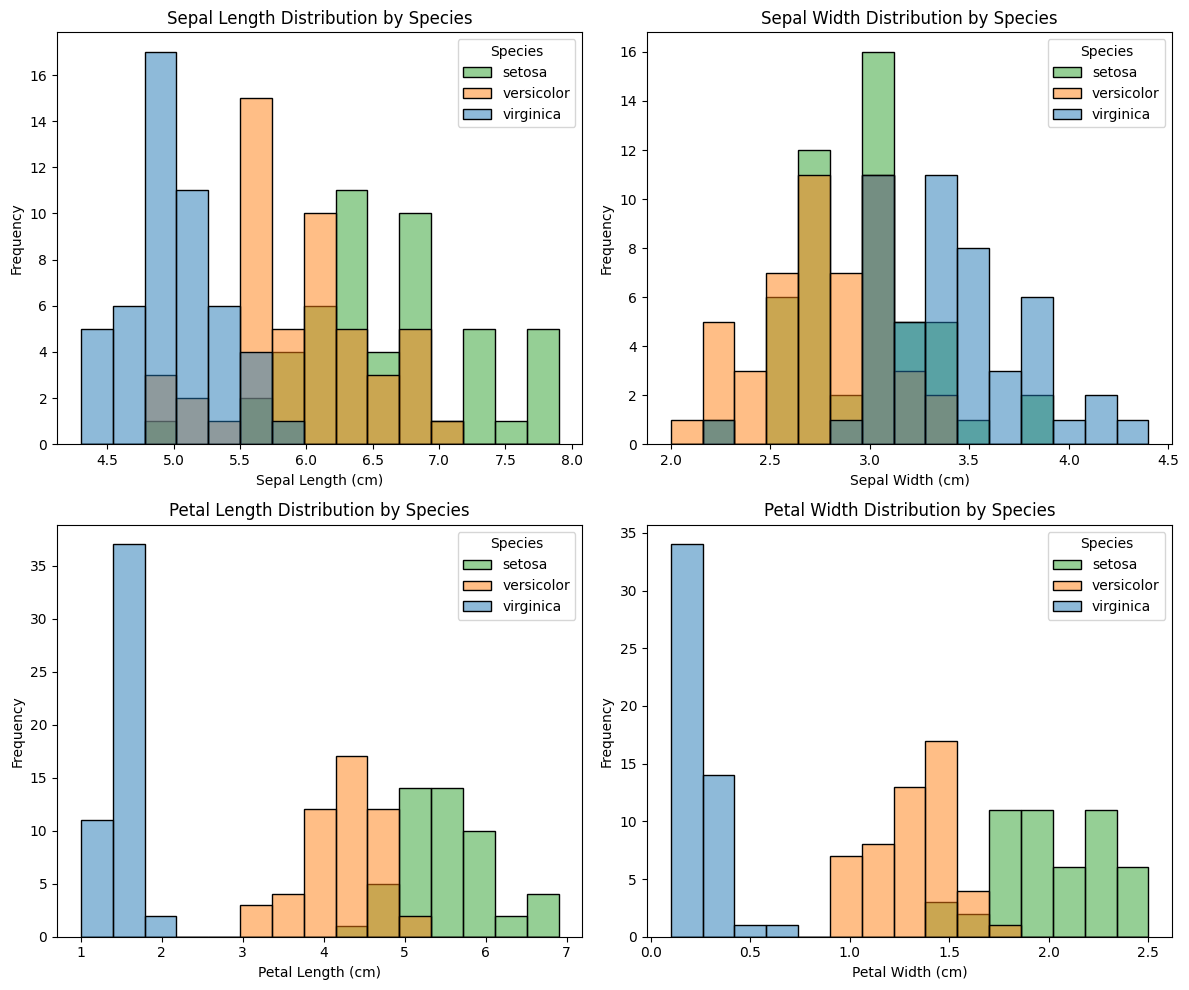

In [45]:
# Set up the figure
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot histogram for Sepal Length
sns.histplot(data=df, x="sepal_length", hue="species", kde=False, ax=axes[0, 0], bins=15)
axes[0, 0].set_title("Sepal Length Distribution by Species")
axes[0, 0].set_xlabel("Sepal Length (cm)")
axes[0, 0].set_ylabel("Frequency")
axes[0, 0].legend(title="Species", labels=df['species'].unique(), loc='upper right')

# Plot histogram for Sepal Width
sns.histplot(data=df, x="sepal_width", hue="species", kde=False, ax=axes[0, 1], bins=15)
axes[0, 1].set_title("Sepal Width Distribution by Species")
axes[0, 1].set_xlabel("Sepal Width (cm)")
axes[0, 1].set_ylabel("Frequency")
axes[0, 1].legend(title="Species", labels=df['species'].unique(), loc='upper right')

# Plot histogram for Petal Length
sns.histplot(data=df, x="petal_length", hue="species", kde=False, ax=axes[1, 0], bins=15)
axes[1, 0].set_title("Petal Length Distribution by Species")
axes[1, 0].set_xlabel("Petal Length (cm)")
axes[1, 0].set_ylabel("Frequency")
axes[1, 0].legend(title="Species", labels=df['species'].unique(), loc='upper right')

# Plot histogram for Petal Width
sns.histplot(data=df, x="petal_width", hue="species", kde=False, ax=axes[1, 1], bins=15)
axes[1, 1].set_title("Petal Width Distribution by Species")
axes[1, 1].set_xlabel("Petal Width (cm)")
axes[1, 1].set_ylabel("Frequency") 
axes[1, 1].legend(title="Species", labels=df['species'].unique(), loc='upper right')


# Adjust layout for better spacing
plt.tight_layout()
plt.show()

Observations on histagram plots

The plots are all colour coded by species; blue for setosa, orange for versicolor, and green for virginica. 
From the plots it can be seen that for sepal length by species, the setosa species showed a normal distribution with the majority of sepals being around 5.0 cm in length. The versicolor species has a broader range of sepal lengths, with the majority of sepals being approximately 5.5 cm in length. The species with the largest range in length of sepals is the virginica species, and of all the species it is the species with the longest average sepal length.
The plot for sepal width demonstrates that the overall data for all the samples has a normal distribution. 
Contrary to the sepal length data, the smallest sepal width is the cersicolor species, with the virginica species being in the middle of the range, and the setosa species having the largest width. The setosa species also has the broadest range in values of width. 
Similarly to the sepal length, for petal length setosa was the species with the shortest average length and the smallest range. The versicolor species is the species that has an average petal length of around 4.5 cm and demonstrated a normal distribution of values. The virginica species was the species with the longest petal lengths on average, similarly to the sepal lengths. Petal width for the setosa species was the shortest on average. The versicolor species, was the mid-width species, with values between 1.0 cm and 2.0 cm. The petal width for the virginica species was the widest.
The sepal width and petal width for the setosa species are contrary to one another. For the petal measurements of length and width, the setosa species is the shortest and narrowest and the values for this species also separated away from the other two species.

## Task 5: Investigate Relationships

To further explore the similarities and differences within the dataset, a scatter-plot was formed for each pair of features, sepal length and width, and petal length and width. This would help to illustrate any similarities/differences within the pairs of measured features.

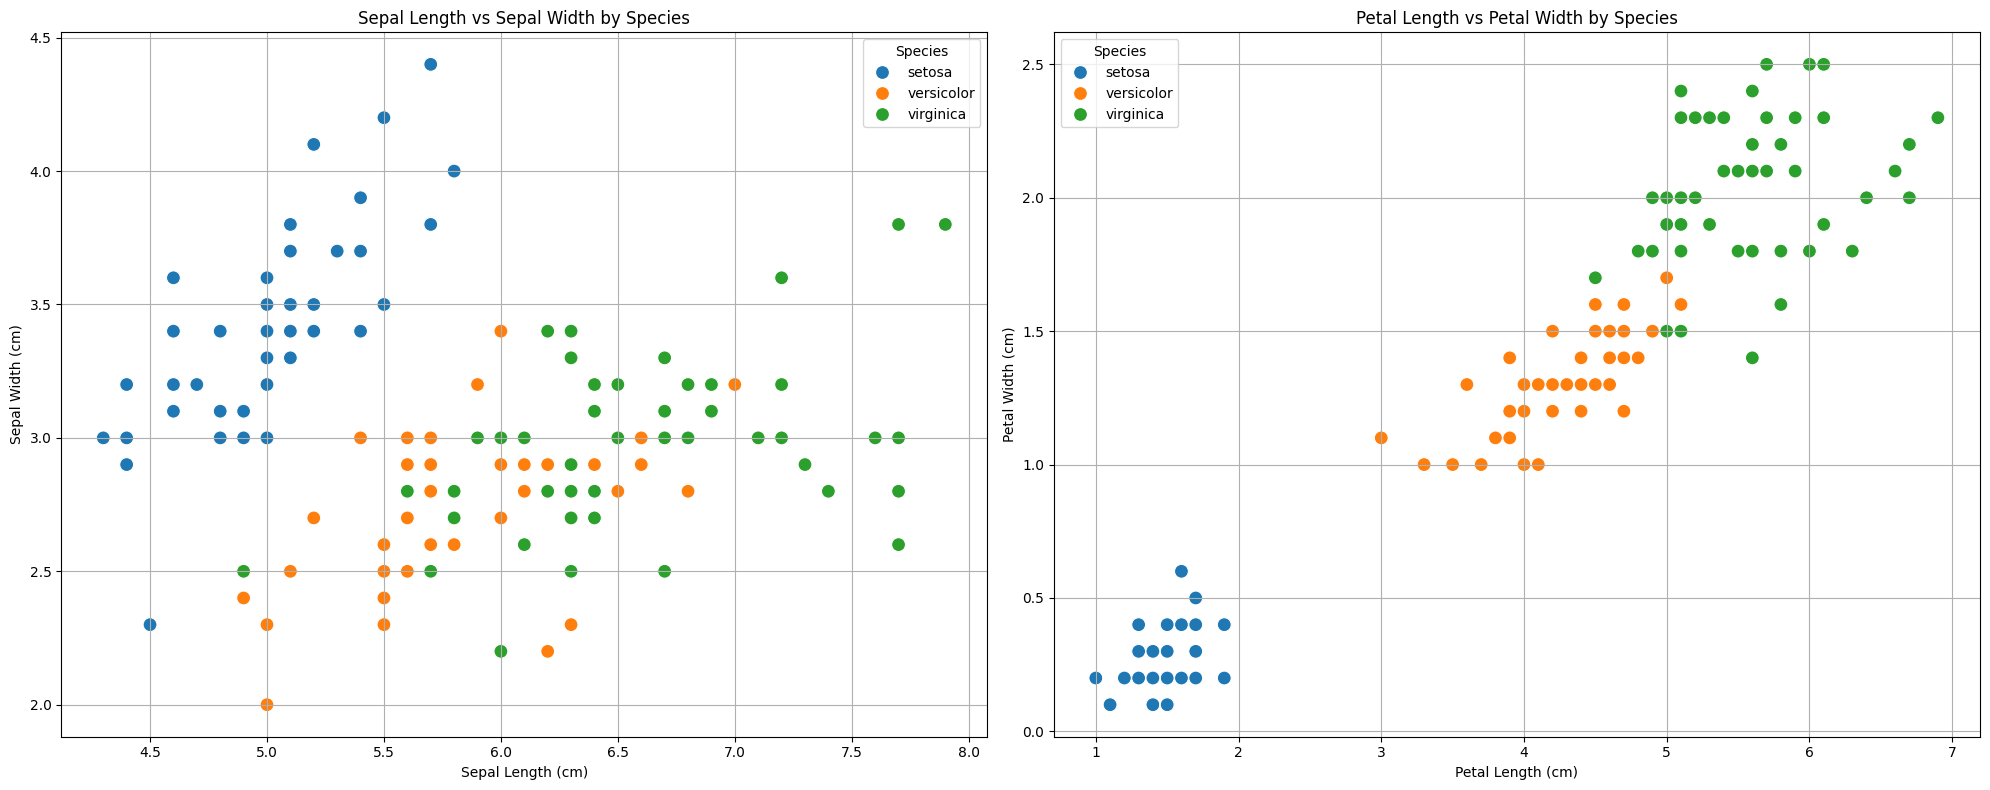

In [46]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Scatter plot for sepal length vs width
sns.scatterplot(ax=axes[0], data=df, x='sepal_length', y='sepal_width', hue='species', s=100)
axes[0].set_title('Sepal Length vs Sepal Width by Species')
axes[0].set_xlabel('Sepal Length (cm)')
axes[0].set_ylabel('Sepal Width (cm)')
axes[0].legend(title='Species')
axes[0].grid(True)

# Scatter plot for petal length vs width
sns.scatterplot(ax=axes[1], data=df, x='petal_length', y='petal_width', hue='species', s=100)
axes[1].set_title('Petal Length vs Petal Width by Species')
axes[1].set_xlabel('Petal Length (cm)')
axes[1].set_ylabel('Petal Width (cm)')
axes[1].legend(title='Species')
axes[1].grid(True)

plt.tight_layout()
plt.show()

From the scatter plots, it suggests that it may be easier to discern if measurements are for setosa as it separates out more than the other 2 species. It may be more difficult to differentiate between virginica and versicolor as many of the values look to be of similar value ranges for both sepal length vs. width, and petal length vs. width.

## Task 6: Analyze Relationship

To further explore what the data is saying, add regression lines to the scatter plots from task 5.

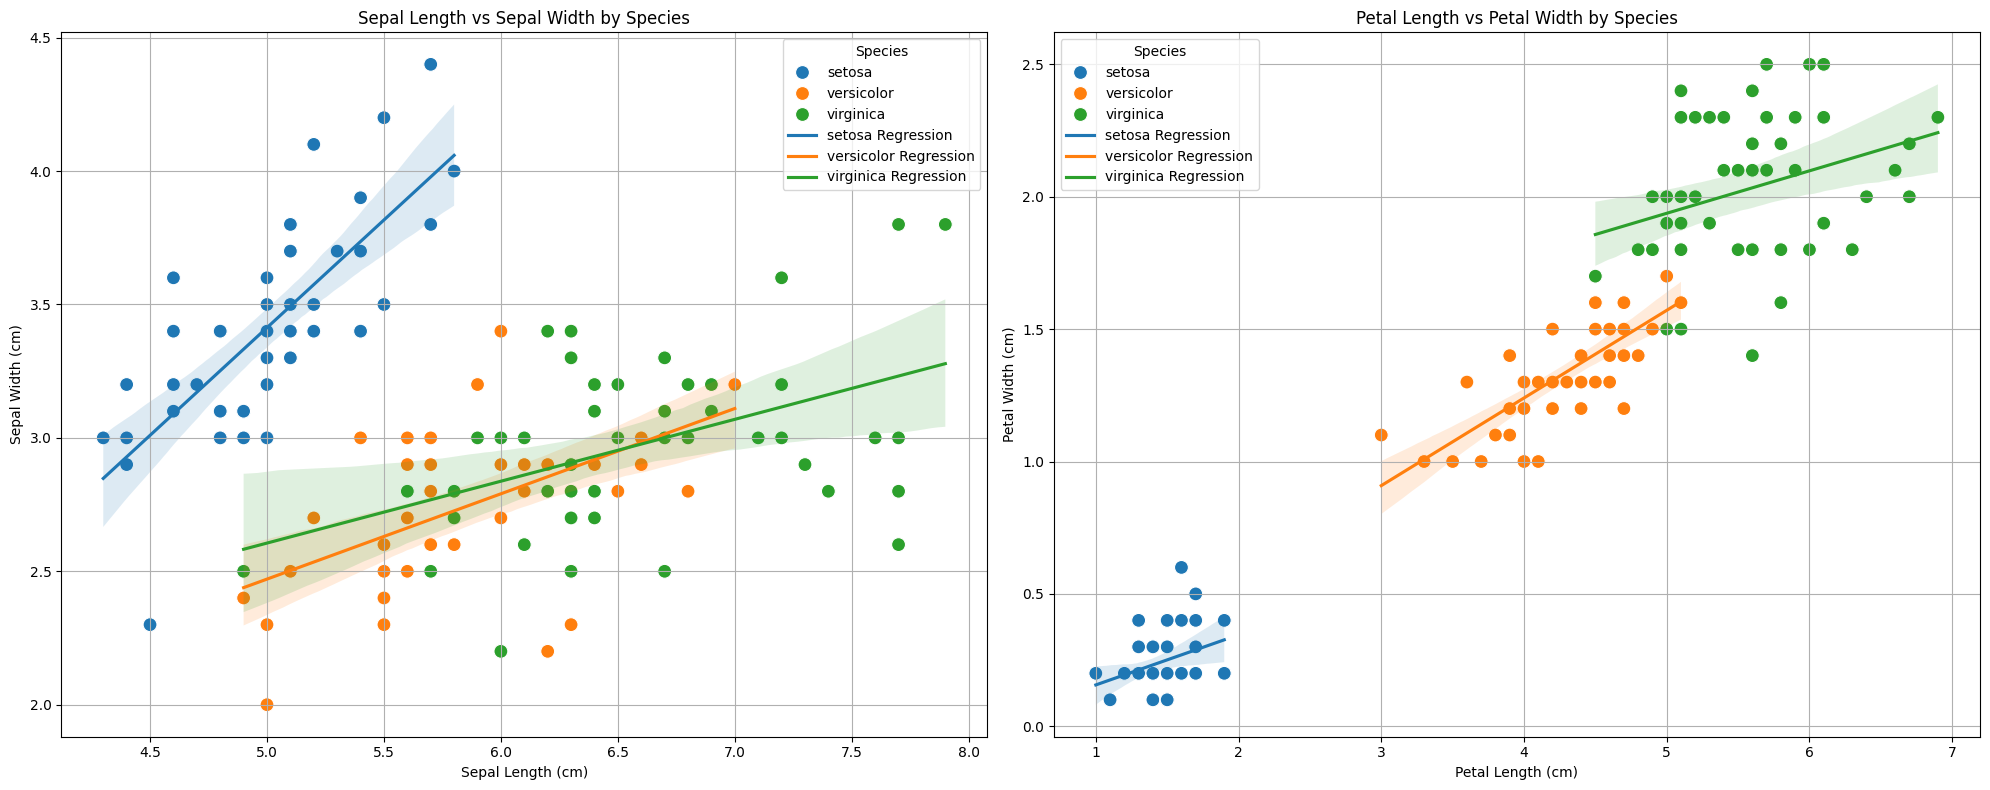

In [47]:
# Create a figure with two subplots - just like before
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# The difference this time is creating a regression line for each species, this makes it easier to observe any patterns or relationships in the data.
# Scatter plot with regression line for sepal length vs width 
sns.scatterplot(ax=axes[0], data=df, x='sepal_length', y='sepal_width', hue='species', s=100)
for species in df['species'].unique():
    subset = df[df['species'] == species]
    sns.regplot(ax=axes[0], data=subset, x='sepal_length', y='sepal_width', scatter=False, label=f'{species} Regression')
axes[0].set_title('Sepal Length vs Sepal Width by Species')
axes[0].set_xlabel('Sepal Length (cm)')
axes[0].set_ylabel('Sepal Width (cm)')
axes[0].legend(title='Species')
axes[0].grid(True)

# Scatter plot with regression line for petal length vs width
sns.scatterplot(ax=axes[1], data=df, x='petal_length', y='petal_width', hue='species', s=100)
for species in df['species'].unique():
    subset = df[df['species'] == species]
    sns.regplot(ax=axes[1], data=subset, x='petal_length', y='petal_width', scatter=False, label=f'{species} Regression')
axes[1].set_title('Petal Length vs Petal Width by Species')
axes[1].set_xlabel('Petal Length (cm)')
axes[1].set_ylabel('Petal Width (cm)')
axes[1].legend(title='Species')
axes[1].grid(True)

plt.tight_layout()
plt.show()

what do the plots wwith regression lines show for each species for each pair? - DELETE LATER

A way to conduct relationship investigations is through Principal Component Analysis (PCA) - I did this for my PhD research and found it was a great way to clearly look at multiple data aspects at once. (https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_iris.html )


In [48]:
## Principal Component Analysis
X = df.iloc[:, :4] # The first four columns are the features (sepal length, sepal width, petal length, petal width)
# The last column is the target variable (species).
y = df['species']
# However, we need to standardise the data before performing PCA.


An important note of PCA is that the data needs to be standardised for it. 
When standardising data, it's important that it is scaled correctly, otherwise the results will appear skewed and purely incorrect.

In [49]:
# Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled[:5])  # Print first 5 rows of scaled data

[[-0.90068117  1.03205722 -1.3412724  -1.31297673]
 [-1.14301691 -0.1249576  -1.3412724  -1.31297673]
 [-1.38535265  0.33784833 -1.39813811 -1.31297673]
 [-1.50652052  0.10644536 -1.2844067  -1.31297673]
 [-1.02184904  1.26346019 -1.3412724  -1.31297673]]


The analysis can then be run again.

In [50]:
# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

We can then view the standardised PCA analysis.

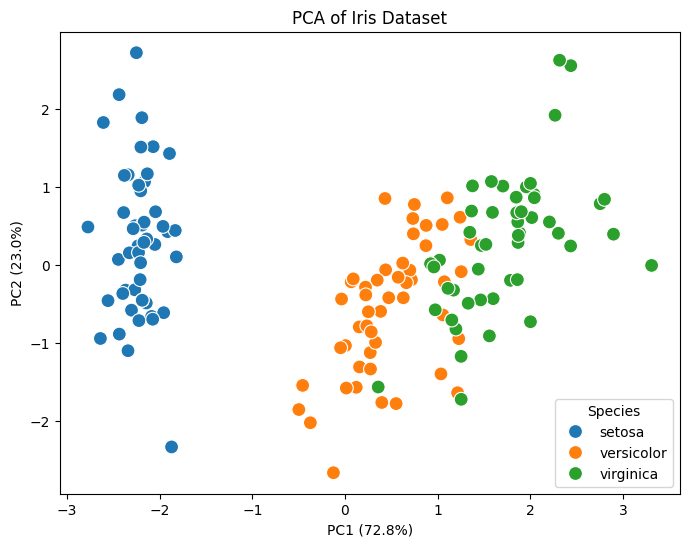

In [51]:
# Visualize PCA results
plt.figure(figsize=(8, 6))
sns.scatterplot(x=principal_components[:, 0], y=principal_components[:, 1], 
                hue=df['species'], s=100) # Scatter plot of the first two principal components
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})') # PC1 is the first principal component, which is the petal length and width
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})') # PC2 is the second principal component, which is the sepal length and width
plt.title("PCA of Iris Dataset")
plt.legend(title='Species')
plt.show()

### What do the relationships show? 

#### Data Structure:

150 samples with 4 features (all numerical)

3 balanced classes (50 samples per species)

No missing values


#### PCA Insights:

First 2 components explain 95.8% of variance

PC1 (73% variance) strongly correlates with petal measurements Suggesting that petal length and width are responsible for the majority of the variance within the data.

PC2 (22.8% variance) relates to sepal width and length 



## Task 7: Analyze Class Distributions

To specifically analyse the data seen within each species, the data needs to be seperated out into the 3 respective species.

We already know that the iris dataset is balanced with 50 samples measured for each of the three species.

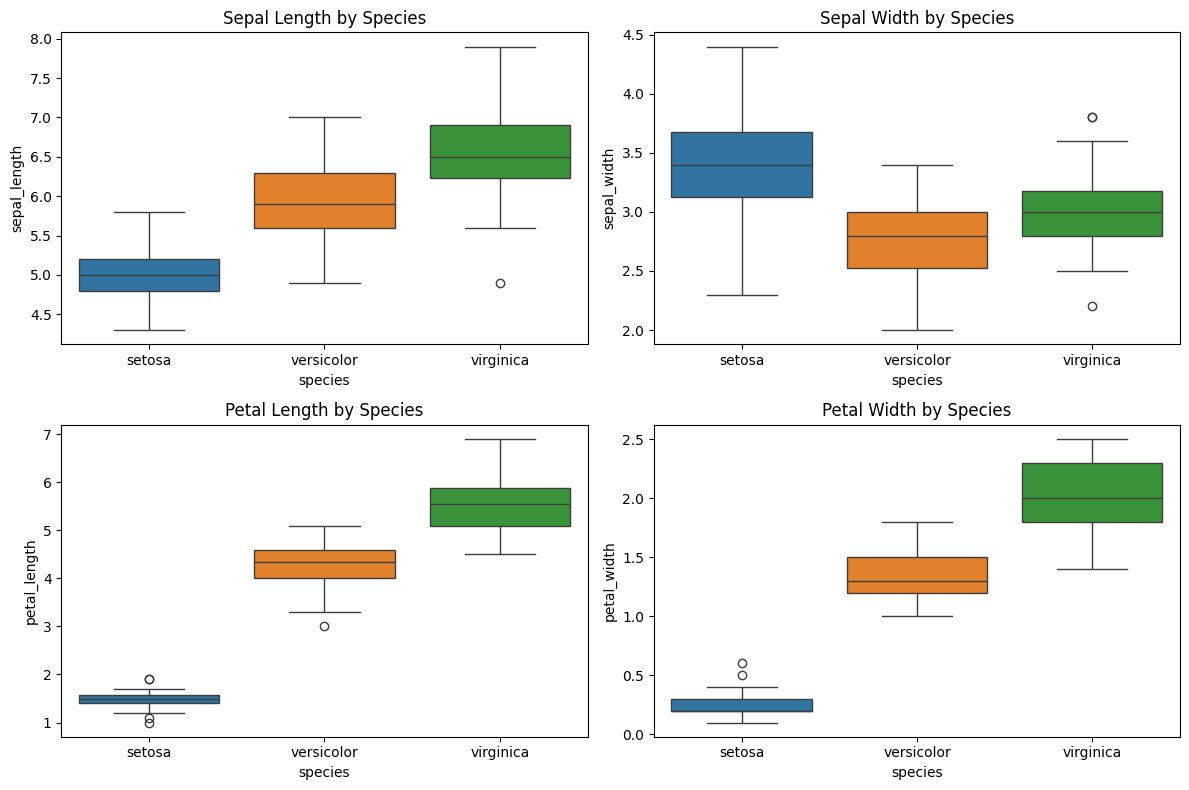

In [52]:
# Boxplots by species

# Define feature names and their corresponding titles
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
titles = ['Sepal Length by Species', 'Sepal Width by Species', 
          'Petal Length by Species', 'Petal Width by Species']

plt.figure(figsize=(12, 8))
for i, feature in enumerate(['sepal_length', 'sepal_width', 'petal_length', 'petal_width']):
    ax = plt.subplot(2, 2, i+1)
    sns.boxplot(x='species', y=feature, hue='species', data=df, ax=ax)
    ax.set_title(titles[i])
plt.tight_layout()
plt.show()

Boxplots are a great way to visualise the data range, potential outliers, the inter-quartile range, and the median. Setosa had 3 outliers in the data for petal length, and 2 outliers in the data for petal width, virginica had 1 outlier for sepal length, and 2 outliers fort sepal width, whereas versicolor had one outlier for petal length only. Setosa had the shortest sepal length on average, but had the widest sepal width. Setosa also had the shortest and narrowest petal length and width, respectively. Although the measurements for the 4 features for versicolor and virginica did differ somewhat, there were instances where their measurements overlapped/were similar, for example, sepal width and sepal length. From the plots it can be further seen that some features may be significantly different in their distributions between species, petal length and petal width, and this may make these features valuable for classification. (https://www.nickmccullum.com/python-visualization/boxplot/ , https://www.ncl.ac.uk/webtemplate/ask-assets/external/maths-resources/statistics/data-presentation/box-and-whisker-plots.html )

## Task 8: Compute Correlations

In order to assess whether there are similarities or differences between the iris  features, the length/width of the sepals and petals. It is important to conduct analysis into the relationship between sepal length and width, and petal length and with against the particular species. This will also help further down the line when designing a method to predict the species of an iris flower from measurements alone.

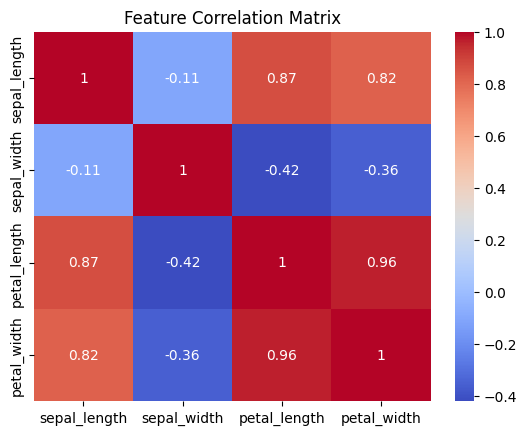

In [53]:
## Correlation Analysis
corr_matrix = df.iloc[:, :4].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

From the plot, it can be seen that the warmer the colour/higher the number, closer to 1 in the range (-0.4 - 1), the greater the correlation with the other feature analysed. It can be seen that the petal measurements (length and/or width) show a strong positive correlation (r = 0.96). This indicates that petal length and petal width vary together, due to them often showing a positive correlation within the dataset. The positive correlation between the petal measurements also bolsters the suggestion that petal length and width may be a useful determining factor when it comes to classification.

The value for sepal width is often below 0 (-0.11, -0.42, -0.36), indicating that it has the lowest correlation with other features.

## Task 9: Fit a Simple Linear Regression

Basic linear regression was conducted on the dataset. First the dataset was split into sepal length and width data, as well as petal length and width data. For making models and predicting for multiple features, this will be done after using a logistic regression model.

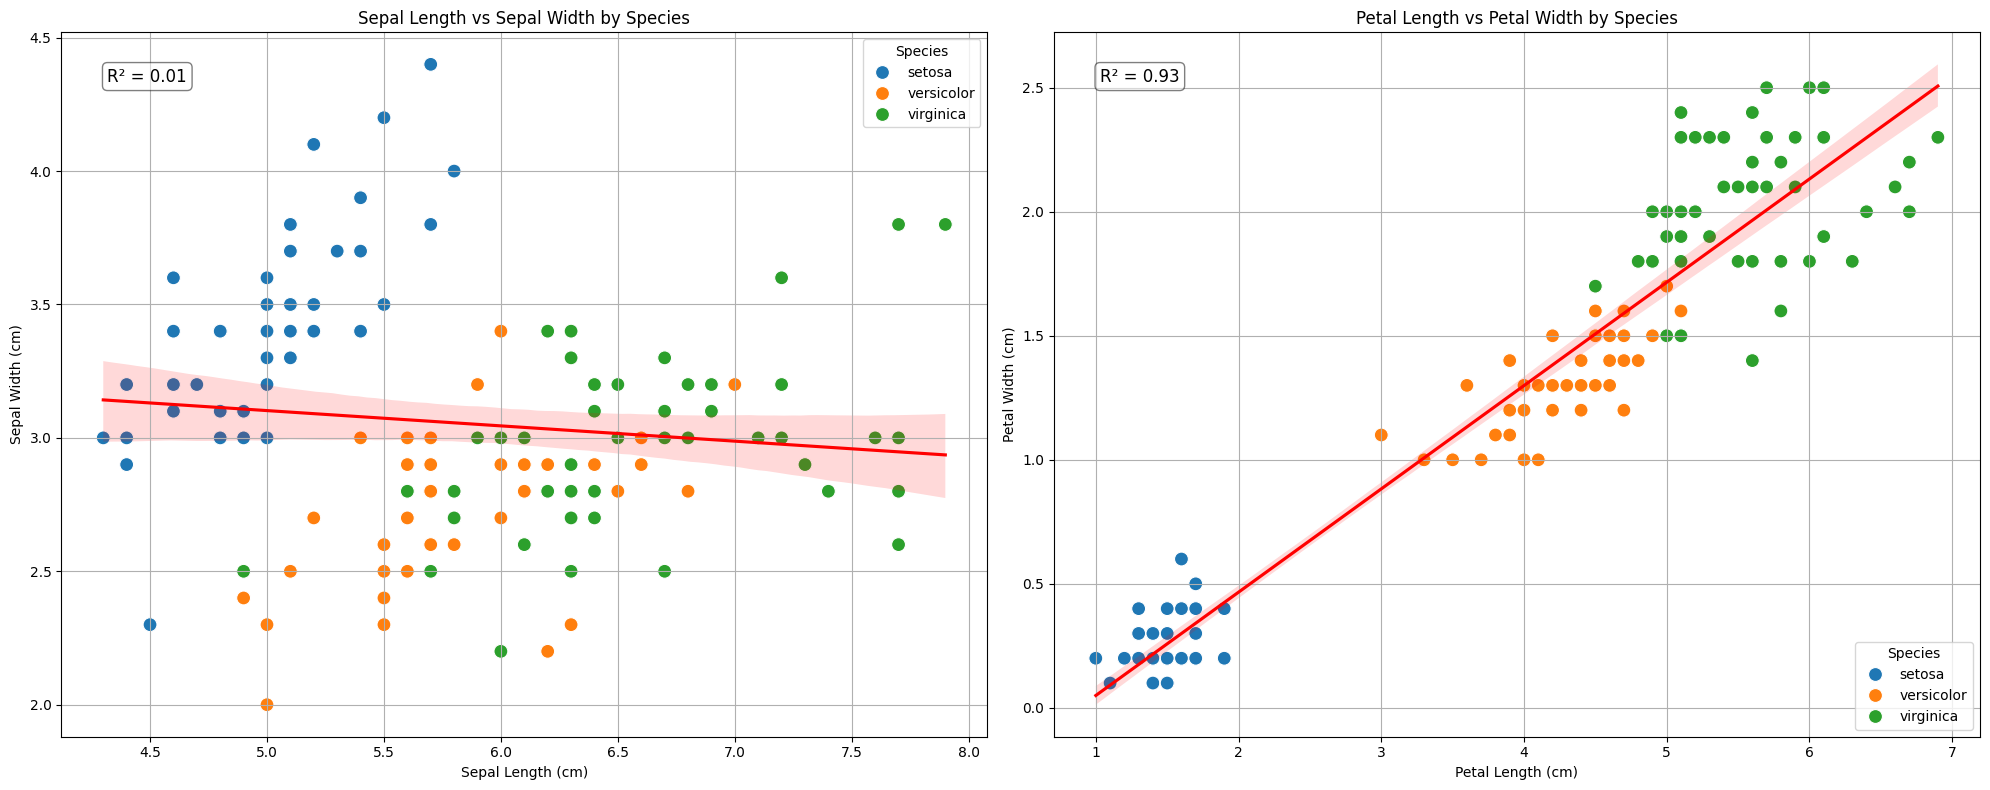

In [54]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Sepal Length vs Sepal Width
X_sepal = df[['sepal_length']]
y_sepal = df['sepal_width']
model_sepal = LinearRegression()
model_sepal.fit(X_sepal, y_sepal)
y_sepal_pred = model_sepal.predict(X_sepal)
r2_sepal = r2_score(y_sepal, y_sepal_pred)

sns.scatterplot(ax=axes[0], data=df, x='sepal_length', y='sepal_width', hue='species', s=100)
sns.regplot(ax=axes[0], data=df, x='sepal_length', y='sepal_width', scatter=False, color='red')
axes[0].set_title('Sepal Length vs Sepal Width by Species')
axes[0].set_xlabel('Sepal Length (cm)')
axes[0].set_ylabel('Sepal Width (cm)')
axes[0].legend(title='Species')
axes[0].grid(True)
axes[0].text(0.05, 0.95, f'R² = {r2_sepal:.2f}', transform=axes[0].transAxes, fontsize=12, verticalalignment='top', bbox=dict(boxstyle="round", facecolor="white", alpha=0.5))

# Petal Length vs Petal Width
X_petal = df[['petal_length']]
y_petal = df['petal_width']
model_petal = LinearRegression()
model_petal.fit(X_petal, y_petal)
y_petal_pred = model_petal.predict(X_petal)
r2_petal = r2_score(y_petal, y_petal_pred)

sns.scatterplot(ax=axes[1], data=df, x='petal_length', y='petal_width', hue='species', s=100)
sns.regplot(ax=axes[1], data=df, x='petal_length', y='petal_width', scatter=False, color='red')
axes[1].set_title('Petal Length vs Petal Width by Species')
axes[1].set_xlabel('Petal Length (cm)')
axes[1].set_ylabel('Petal Width (cm)')
axes[1].legend(title='Species')
axes[1].grid(True)
axes[1].text(0.05, 0.95, f'R² = {r2_petal:.2f}', transform=axes[1].transAxes, fontsize=12, verticalalignment='top', bbox=dict(boxstyle="round", facecolor="white", alpha=0.5))

plt.tight_layout()
plt.show()

The left scatter plot displays a single regression line fitted across all data points for the relationship between sepal length and sepal width for the three iris species, setosa, versicolor, and virginica, are colour coded, the line shows the linear relationship between the length and width of the sepals. Due to the near "flat" nature of the regression line, a weak relationship between the features is observed. In the top left of the plot the R<sup>2</sup> value is displayed, this value explains the variance in sepal width based on sepal length. The R<sup>2</sup> value is 0.01, this denotes a low value, as such it indicates that sepal length is not a strong predictor for sepal width, thus other factors may influence the relationship between these features. Similarly to observations from the boxplots and histograms,the setosa species appears to cluster together in a distinctly separate group to teh versicolor and virginica. The latter two species of versicolor and virginica overlap significantly in sepal measurements, this would make it harder to distinguish between these species based solely on sepal measurements.

The right scatter plot displays the plot for the relationships between petal length and petal width for the three iris species, the colours for the species are the same as in the left plot. Blue for setosa, orange for versicolor, and green for virginica. Compared to the sepal plot, the petal measurements plot shows distinct clustering for each individual species. The regression line is fitted across all data points, again representing the overall linear relationship between petal length and width. This line has a sharp angle with the data points clustered close to the line. The R<sup>2</sup> value is 0.93, indicating that most of the variance is petal width can be explained by petal length. This suggests that petal length is a strong predictor of petal width. Again, the setosa species clearly separates from versicolor and virginica, the setosa species had smaller petal widths and lengths. Compared to what was observed for sepal feature relationships, for petal features, versicolor and virginica are more distinctly clustered, with some minimal overlap.

Setosa clearly separates from the other two species in both plots, this makes it easier to classify.

(R^2 understanding https://www.investopedia.com/terms/r/r-squared.asp , Linear RM datacamp https://www.datacamp.com/tutorial/simple-linear-regression , linear regression https://www.ibm.com/think/topics/linear-regression , understanding linear regression https://datatab.net/tutorial/linear-regression ) (To sub/sup -erscript = <sup></sup> sub/sup-erscript text <sub></sub> <- click on cell to find notation)

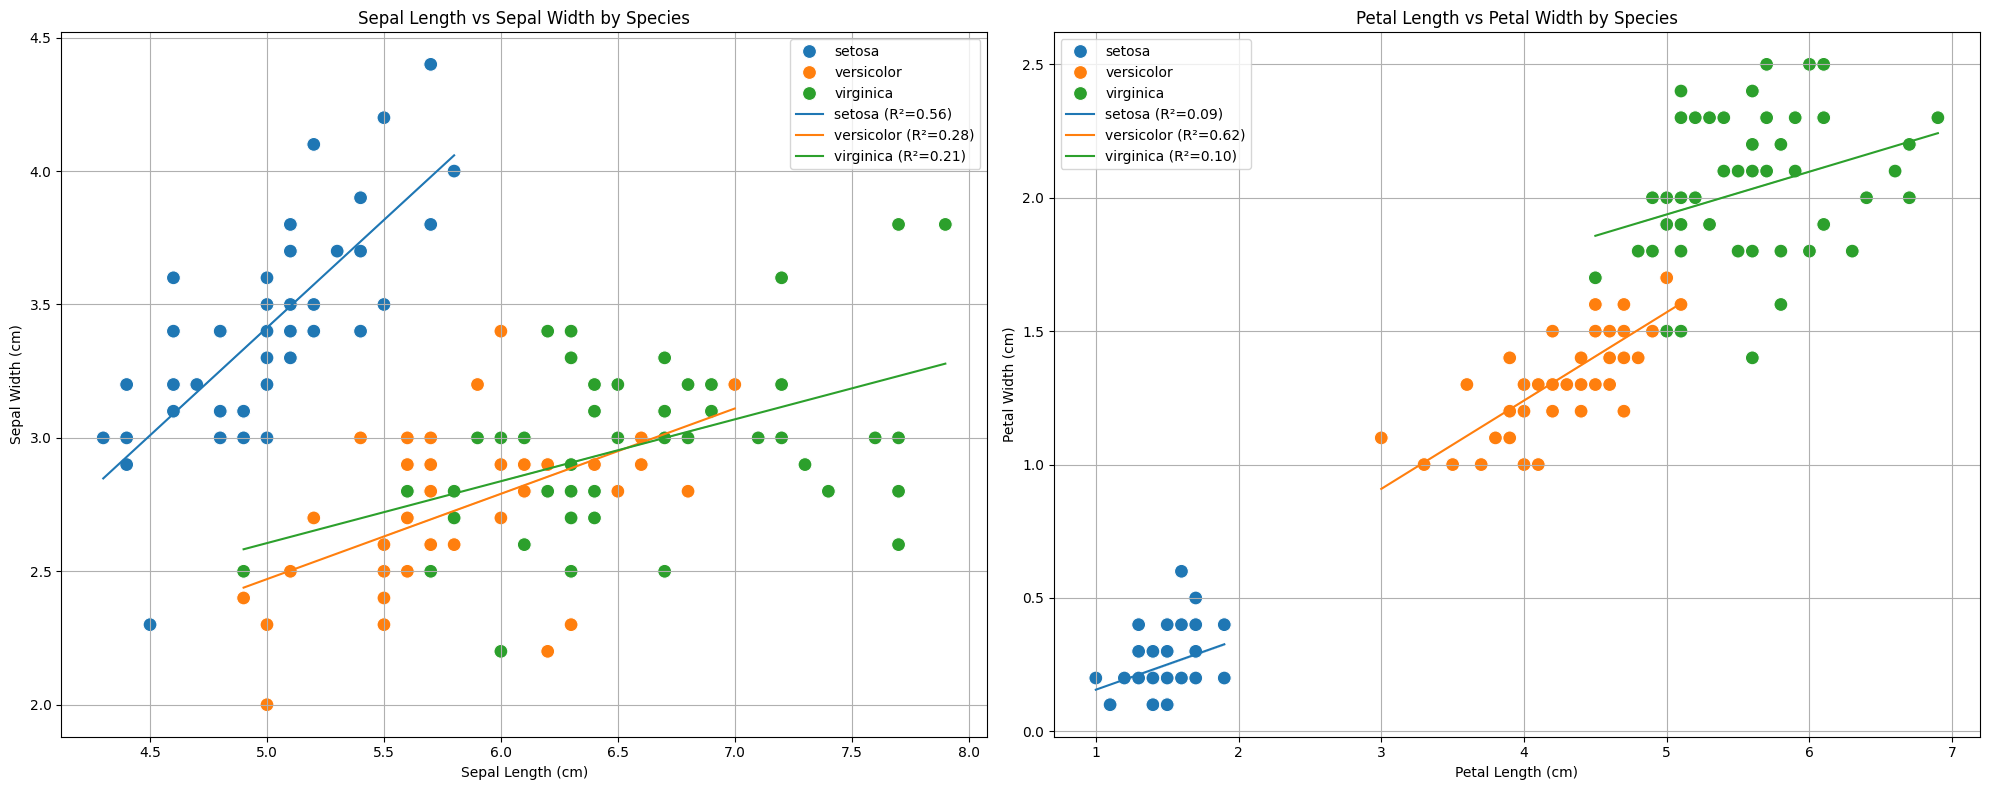

In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Sepal Length vs Sepal Width
sns.scatterplot(ax=axes[0], data=df, x='sepal_length', y='sepal_width', hue='species', s=100)
axes[0].set_title('Sepal Length vs Sepal Width by Species')
axes[0].set_xlabel('Sepal Length (cm)')
axes[0].set_ylabel('Sepal Width (cm)')
axes[0].legend()
axes[0].grid(True)

# Fit and plot regression lines for each species
for species in df['species'].unique():
    subset = df[df['species'] == species]
    X = subset[['sepal_length']]
    y = subset['sepal_width']
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    r2 = r2_score(y, y_pred)
    sns.lineplot(ax=axes[0], x=subset['sepal_length'], y=y_pred, label=f'{species} (R²={r2:.2f})')

# Petal Length vs Petal Width
sns.scatterplot(ax=axes[1], data=df, x='petal_length', y='petal_width', hue='species', s=100)
axes[1].set_title('Petal Length vs Petal Width by Species')
axes[1].set_xlabel('Petal Length (cm)')
axes[1].set_ylabel('Petal Width (cm)')
axes[1].legend()
axes[1].grid(True)

# Fit and plot regression lines for each species
for species in df['species'].unique():
    subset = df[df['species'] == species]
    X = subset[['petal_length']]
    y = subset['petal_width']
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    r2 = r2_score(y, y_pred)
    sns.lineplot(ax=axes[1], x=subset['petal_length'], y=y_pred, label=f'{species} (R²={r2:.2f})')

plt.tight_layout()
plt.show()

To further explore the dataset and to illustrate how the sepal measurements and petal measurements differ in their potential use in predicting classifications.
The dataset for the linear regression models for the sepal data and petal data was split into train and test data (80 % for training 20 % for testing). This was done for the length and width data values.

Sepal Linear Regression Results:
Coefficient: -0.0527
Intercept: 3.3634
Mean squared error: 0.1397
R-squared score: 0.0236


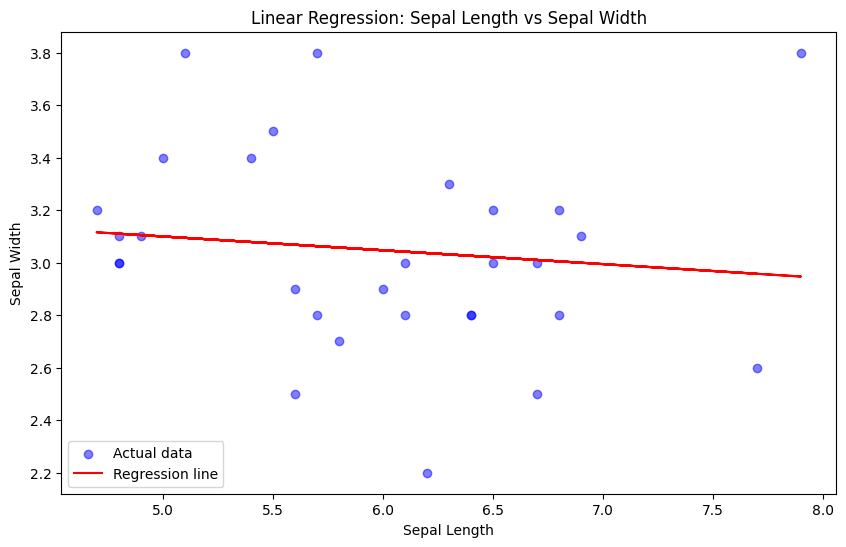

In [72]:
# Prepare data for sepal linear regression
X_sepal = df[['sepal_length']]
y_sepal = df['sepal_width']

# Split the dataset
X_sepal_train, X_sepal_test, y_sepal_train, y_sepal_test = train_test_split(X_sepal, y_sepal, test_size=0.2, random_state=42)

# Create and fit the model
model_sepal = LinearRegression()
model_sepal.fit(X_sepal_train, y_sepal_train)

# Make predictions
y_sepal_pred = model_sepal.predict(X_sepal_test)

# Calculate metrics
mse_sepal = mean_squared_error(y_sepal_test, y_sepal_pred)
r2_sepal = r2_score(y_sepal_test, y_sepal_pred)

print("Sepal Linear Regression Results:")
print(f"Coefficient: {model_sepal.coef_[0]:.4f}")
print(f"Intercept: {model_sepal.intercept_:.4f}")
print(f"Mean squared error: {mse_sepal:.4f}")
print(f"R-squared score: {r2_sepal:.4f}")

# Visualize results
plt.figure(figsize=(10, 6))
plt.scatter(X_sepal_test, y_sepal_test, color='blue', alpha=0.5, label='Actual data')
plt.plot(X_sepal_test, y_sepal_pred, color='red', label='Regression line')
# adding a title and labels
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Linear Regression: Sepal Length vs Sepal Width')
plt.legend()
plt.show()

This was then used to predict sepal width depending on the sepal length.

In [73]:
# Example prediction for sepal model
new_sepal_length = pd.DataFrame([[5.7]], columns=['sepal_length'])  # Match the feature name used during training - np array is still there just within the dataframe now
predicted_sepal_width = model_sepal.predict(new_sepal_length)

print("\nSepal Width Prediction:")
print(f"For a sepal length of 5.7 cm, the predicted sepal width is: {predicted_sepal_width[0]:.2f} cm")


Sepal Width Prediction:
For a sepal length of 5.7 cm, the predicted sepal width is: 3.06 cm


It should be noted, that the spread of the actual data in relation to the regression line for the sepal length and width shows a low linear relationship between the length and width of the sepal. That is, although there was some relationship between the length and width of the sepal, due to the low linear relationship, the accuracy of the prediction of one value (i.e. sepal width) based on another value (i.e. sepal length) would not be very/entirely accurate.

Next the same was done with the petal length and width.


Petal Linear Regression Results:
Coefficient: 0.4141
Intercept: -0.3609
Mean squared error: 0.0456
R-squared score: 0.9283


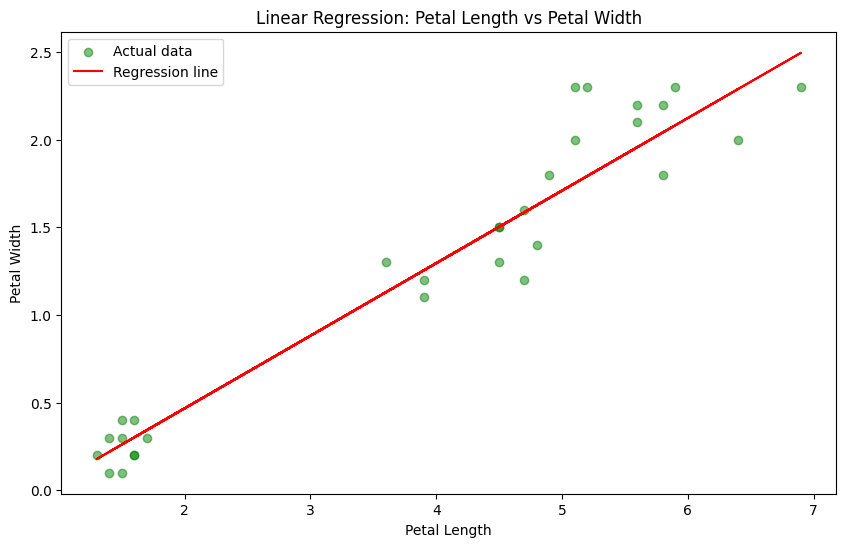

In [74]:
# Prepare data for petal linear regression
X_petal = df[['petal_length']]
y_petal = df['petal_width']

# Split the dataset
X_petal_train, X_petal_test, y_petal_train, y_petal_test = train_test_split(X_petal, y_petal, test_size=0.2, random_state=42)

# Create and fit the model
model_petal = LinearRegression()
model_petal.fit(X_petal_train, y_petal_train)

# Make predictions
y_petal_pred = model_petal.predict(X_petal_test)

# Calculate metrics
mse_petal = mean_squared_error(y_petal_test, y_petal_pred)
r2_petal = r2_score(y_petal_test, y_petal_pred)

print("\nPetal Linear Regression Results:")
print(f"Coefficient: {model_petal.coef_[0]:.4f}")
print(f"Intercept: {model_petal.intercept_:.4f}")
print(f"Mean squared error: {mse_petal:.4f}")
print(f"R-squared score: {r2_petal:.4f}")

# Visualize results
plt.figure(figsize=(10, 6))
plt.scatter(X_petal_test, y_petal_test, color='green', alpha=0.5, label='Actual data')
plt.plot(X_petal_test, y_petal_pred, color='red', label='Regression line')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Linear Regression: Petal Length vs Petal Width')
plt.legend()
plt.show()

The spread of the data around the regression line shows a moderate to high linear relationship between petal length and width values.

A prediction was also made:

In [75]:
# Example prediction for petal model
new_petal_length = pd.DataFrame([[4.5]], columns=['petal_length'])  # Match the feature name used during training - np array is again wrapped in the dataframe 
predicted_petal_width = model_petal.predict(new_petal_length)

print("\nPetal Width Prediction:")
print(f"For a petal length of 4.5 cm, the predicted petal width is: {predicted_petal_width[0]:.2f} cm")


Petal Width Prediction:
For a petal length of 4.5 cm, the predicted petal width is: 1.50 cm


Due to the nature of the relationship between the petal length and petal width, the prediction made here will be more accurate than that seen for the sepal feature.

## Task 10: Too Many Features

A pairplot is a great way to see the comparison between pairs of features, sepal length vs, sepal width, sepal length vs petal length, sepal length vs petal length, etc. Pairplot analysis outputs multiple subplots that are plotted in a matrix format; row name gives the x axis, column name gives the y axis, and univariate distributions (histogram) are plotted on the diagonal from top left to bottom right for each attribute. (Pairplot visualisation: https://medium.com/analytics-vidhya/pairplot-visualization-16325cd725e6 , https://www.analyticsvidhya.com/blog/2024/02/pair-plots-in-machine-learning/ , https://seaborn.pydata.org/generated/seaborn.pairplot.html , https://builtin.com/articles/seaborn-pairplot )

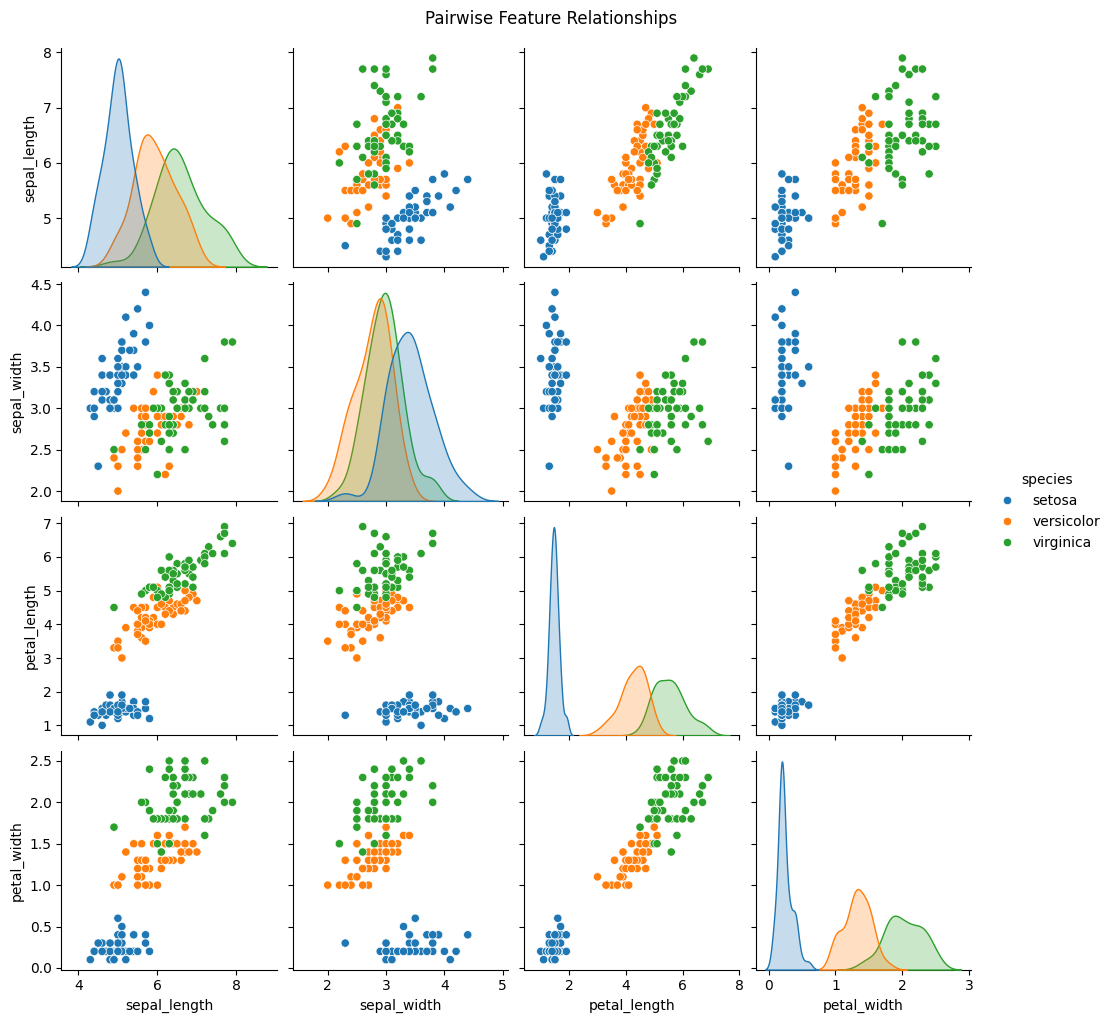

In [76]:
## Visualization
# Pairplot colored by species
sns.pairplot(df, hue='species', height=2.5)
plt.suptitle("Pairwise Feature Relationships", y=1.02)
plt.show()

There are a number of features for analysis within this data. To make predictions with multiple features more accurately a Logistic Regression model can be made. Although a linear regression model has previously been added to the data, it is possible to predict a species based on the measurements taken through using a logistic regression model.

Using a Logistic Regression Model on the iris dataset is appropriate due to the relatively small size of the dataset (Log Regression Models work well with small, linearly separable datasets). The model is good for multi-class classification, as seen in the dataset with the "species" classifications.

To break-down the work

When looking at the results of the logistic regression model, there are some things that should be taken into consideration. The iris dataset is relatively small, and when it is split on a species level, it has even fewer values. Although Logistic Regression Models work well on small datasets, splitting the dataset into multiple species creates a condensed dataset and may, not be representitive of the wider population. (Logistic model for species classification - https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html , https://www.ibm.com/think/topics/logistic-regression)

In [77]:
# Prepare data for species classification
X_species = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']] # These are the features that will be used during the classification.
y_species = df['species'] # This is the target variable that is aimed to be predicted.

# Encode species names to numerical values - Encoding species as numerical values (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html )
le = LabelEncoder()
y_species = le.fit_transform(y_species) # setosa = 0, versicolor = 1, virginica = 2

# Split the dataset into an 80 % (training) and 20 % (testing) split.
X_species_train, X_species_test, y_species_train, y_species_test = train_test_split(X_species, y_species, test_size=0.2, random_state=42)

# Create and fit the model
model_species = LogisticRegression(max_iter=200)
model_species.fit(X_species_train, y_species_train)

# Make predictions on the x_species_test set.
y_species_pred = model_species.predict(X_species_test)

# Calculate accuracy - here the predicted species (y_species_pred) with the actual species (y_species_test) are compared, to see how many were predicted correctly.
accuracy = accuracy_score(y_species_test, y_species_pred)

print("\nLogistic Regression for Species Classification Results:") # How to do it - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_species_test, y_species_pred, target_names=le.classes_))

# Example prediction - predict species based on sepal and petal measurements.
print("\nExample Prediction (measurements in cm):")
example_data = pd.DataFrame([[5.1, 3.5, 1.4, 0.2]], 
                            columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])  # Match feature names to those in the training set
predicted_species = model_species.predict(example_data)

print(f"\nPredicted species for {example_data.iloc[0].tolist()}: {le.inverse_transform(predicted_species)[0]}")


Logistic Regression for Species Classification Results:
Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Example Prediction (measurements in cm):

Predicted species for [5.1, 3.5, 1.4, 0.2]: setosa


For the iris dataset, the Logistic Regression Model achieves high accuracy (~97%), this is due to the simplicity and linear separability of the iris dataset. Accuracy for the Logistic Regression Model is calculated as the ratio of correct predictions to total predictions. The columns for precision and recall measure class specific performance in the model, and the f1-score column gives a balances metric for imbalanced classes (not a problem here as the iris dataset is balanced). In the support column, it can be seen that the Verginica species has a value of 9, demonstrating a slightly lower recall, this is likely due to the overlap with Versicolor. As seen throughout previous testing on the dataset, the majority of the confusion in the dataset occurs between the Bersicolor and Virginica species. 

Initially upon looking at the Classification Report, it could be assumed that the results do not highlight anything. This report provides detailed insights into the performance of the model for each species, showing areas where the model performs well or struggles. However, due to the size of the dataset (150 samples), and then the test set being even smaller (30 samples), it makes it easier for the model to achieve perfect accuracy, this model produced an accuracy of 1.0 (perfect accuracy). A linearly separable dataset is one that shows clear distinctions between classes, for the iris dataset that class difference is seen most clearly in the petal length/width. As the iris dataset is balanced, with an equal number of samples for each class (50), the risk of bias in the model is reduced. In order to improve accuracy and reliability, the model should be rerun a number of times using different splits of the data, this is called cross-validation.

Plot confusion matrix

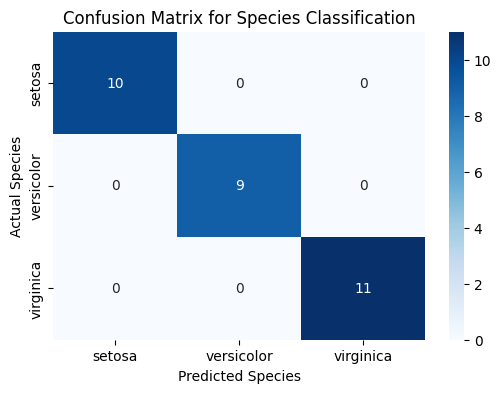

In [78]:
# Confusion matrix
# Generate the confusion matrix
cm = confusion_matrix(y_species_test, y_species_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', 
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix for Species Classification")
plt.xlabel('Predicted Species')
plt.ylabel('Actual Species')
plt.show()

The confusion matrix is a performance evaluation tool for classification models. It provides a summary of the prediction results by comparing the actual labels with the predicted labels. Here's what it shows and why it's useful:

### What the Confusion Matrix Shows:
1. **Structure**: 
   - Rows represent the **actual classes** (ground truth).
   - Columns represent the **predicted classes** (model output).

2. **Values in the Matrix**:
   - **Diagonal values**: Correct predictions (where actual and predicted classes match).
   - **Off-diagonal values**: Misclassifications (where actual and predicted classes differ).


- The diagonal values represent correct predictions.
- Off-diagonal values represent misclassifications.

### Why Use a Confusion Matrix:
1. **Detailed Performance Insight**:
   - It provides a breakdown of correct and incorrect predictions for each class, which is more informative than a single metric like accuracy.

2. **Class-Specific Performance**:
   - Helps identify if the model is performing poorly for specific classes (e.g., one species being misclassified more often than others).

3. **Metrics Derivation**:
   - Metrics like **precision**, **recall**, **F1-score**, and **specificity** can be derived from the confusion matrix to evaluate the model's performance in more detail.

4. **Debugging and Improvement**:
   - By analyzing misclassifications, you can identify patterns or biases in the model, which can guide improvements (e.g., collecting more data for underperforming classes).

In this case, the confusion matrix will helps in understanding how well the logistic regression model classifies the different species and whether there are specific species that are more prone to misclassification.

## References

Thesis

# HELP DOCS

https://www.geeksforgeeks.org/iris-dataset/

https://www.geeksforgeeks.org/exploratory-data-analysis-on-iris-dataset/

https://stackoverflow.com/questions/58260771/how-to-show-firstlast-n-rows-of-a-dataframe

https://bytemedirk.medium.com/mastering-iris-dataset-analysis-with-python-9e040a088ef4


https://medium.com/@kachiann/a-beginners-guide-to-machine-learning-with-python-iris-flower-prediction-61814e095268

https://www.geeksforgeeks.org/python-basics-of-pandas-using-iris-dataset/